# IPL 2008 to 2018 Analysis

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#load data
ipl_match=pd.read_csv("matches.csv")


In [149]:
ipl_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [150]:
ipl_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [151]:
ipl_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [152]:
#shape[] is an attribute of numpy library use for describe an array.
# 1) if shape[0] then it return number of rows of an array.
# 2) if shape[1] then it return number of column of an array.
print("Total number of rows:",ipl_match.shape[0])
print("Total number of columns:",ipl_match.shape[1])
# structure of data


Total number of rows: 696
Total number of columns: 18


In [153]:
print("Total number of matches played:",ipl_match.shape[0])
print("Total season of match till 2018:",len(ipl_match.season.unique()))

Total number of matches played: 696
Total season of match till 2018: 11


In [154]:
print("total teams:",len(ipl_match.team1.unique()))
print("Name team participate:",ipl_match.team1.unique())

total teams: 14
Name team participate: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


In [155]:
print("Total cities where match played:",len(ipl_match.city.unique()))

Total cities where match played: 33


In [156]:
print("Name of cities:",ipl_match.city.unique())

Name of cities: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [157]:
#need to sort data based on season
match=ipl_match.sort_values('season')

In [158]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN


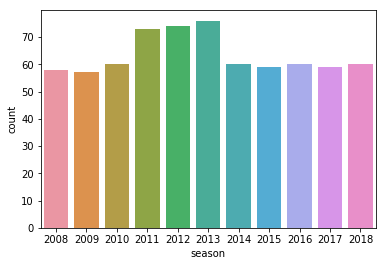

In [159]:
sns.countplot(x='season',data=match)
plt.show()

Hence, we can sea that maxmium number of matches played in 2013

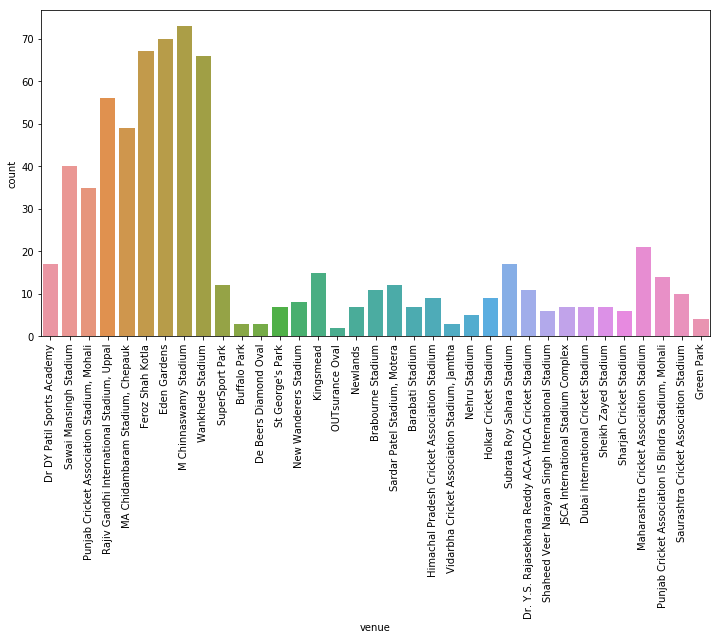

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue' , data=match)
plt.xticks(rotation='vertical')
plt.show()

But this look not clearly. we get difficult to get indentify.


So lets try to order them

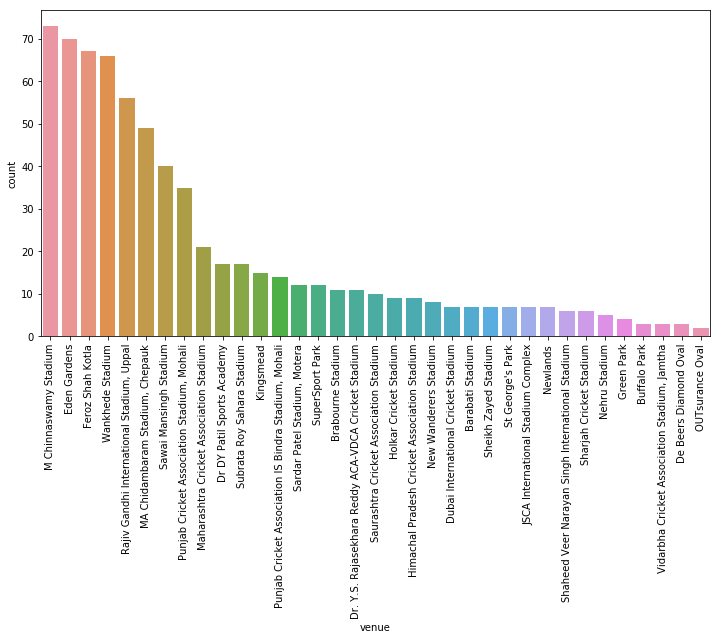

In [161]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue',  data=match , order = match['venue'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Perfect!
Now we can easily identify 

Maximum matches played in M Chinnaswamy Stadium

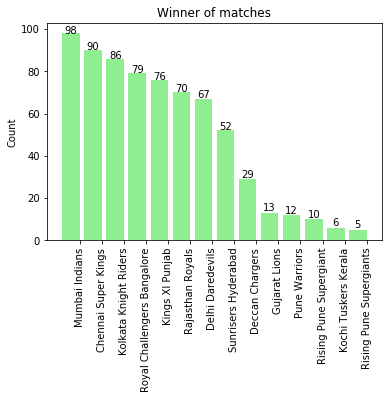

In [162]:
# lets see which team win maximum time
temp_series = ipl_match.winner.value_counts()[:14]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
 
rects = ax.bar(ind, np.array(temp_series), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Winner of matches")

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects)        


plt.show()

As we can see here Mumbai Indians Team win more matches as compare to other.

Lets see season wise winner


Syntax: DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
 
 
 
 1) subset: Subset takes a column or list of column label
 
 
 2) keep: control how to consider duplicate value
       *first: It considers first value as unique and rest of the same values as duplicate.
       *last: It considers last value as unique and rest of the same values as duplicate.
       *False: It consider all of the same values as duplicates.


3) inplace: Boolean values, removes rows with duplicates if True
 
 

In [163]:
season_match=ipl_match.drop_duplicates(subset='season',keep='last')[['season','winner']].reset_index(drop=True)
season_match.sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


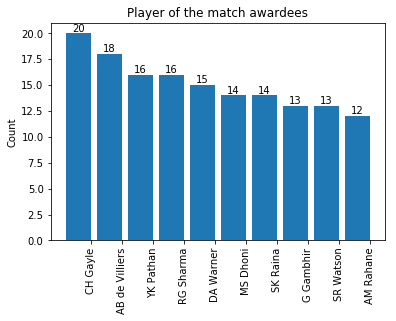

In [164]:
#let's see top players
temp_series = ipl_match.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Player of the match awardees")

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects)        

plt.show()

CH Gayle top player of match(2008 to 2018)

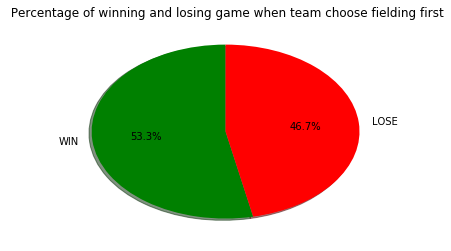

In [165]:
# lets see what win percentage of who take fielding first
num_of_wins = (ipl_match.win_by_wickets>0).sum()
num_of_loss = (ipl_match.win_by_wickets==0).sum()
labels = ["WIN", "LOSE"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(" Percentage of winning and losing game when team choose fielding first")
plt.show()

53.3% chances to win match if any team choose fielding first according to previous IPL records.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


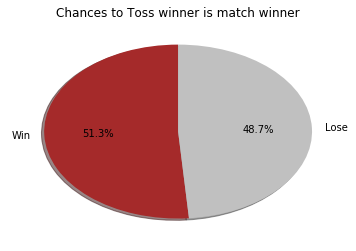

In [166]:
#toss winner is also a match winner
ipl_match['toss_winner_is_winner'] = 'Lose'
ipl_match['toss_winner_is_winner'].loc[ipl_match.toss_winner == ipl_match.winner] = 'Win'
temp_series = ipl_match.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['brown', 'silver']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Chances to Toss winner is match winner")
plt.show()

# Let's analysis score card of players

In [167]:
ipl_score=pd.read_csv('deliveries.csv')

In [168]:
ipl_score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [169]:
ipl_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

Last three column (player_dismissed,dismissal_kind and fielder)  have some null value because it shows 8157 and 5918 out of 164750

In [170]:
ipl_score.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [171]:
print("Number of row:",ipl_score.shape[0])
print("Number of column:",ipl_score.shape[1])

Number of row: 164750
Number of column: 21


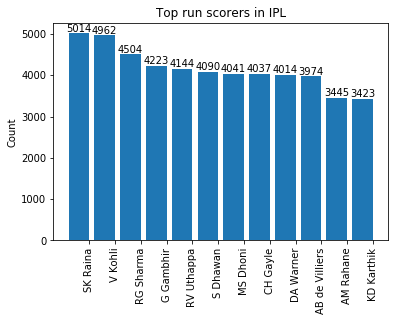

In [172]:
#collect data from data frame to show top scorers 
temp_df = ipl_score.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:12,:]

#adjust data in graph to show proper
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

Here we can say SK Raina score more compare to other player

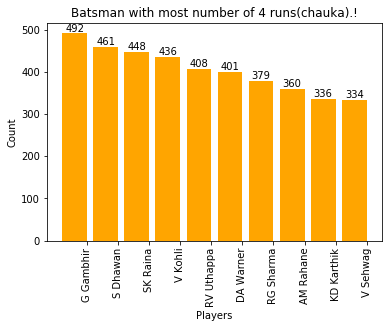

In [173]:
temp_df = ipl_score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Players")
ax.set_title("Batsman with most number of 4 runs(chauka).!")
autolabel(rects)
plt.show()

G Gambhir score more chauka in IPL from 2008 to 2018

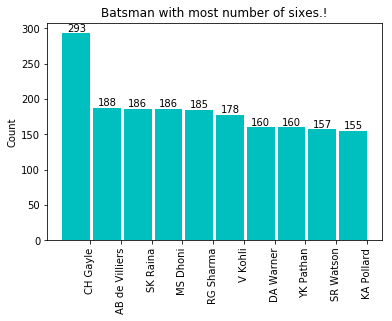

In [174]:
temp_df = ipl_score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

CH Gayle hit more sixes.

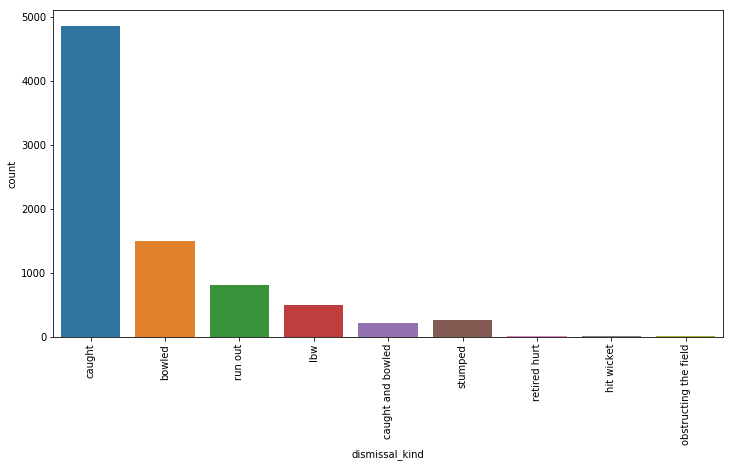

In [175]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=ipl_score)

plt.xticks(rotation='vertical')

plt.show()


Batsman out in ipl more through catches

# After analysis of IPL data from 2008 to 2018 we can give answers of following questions

So, let's start

Q) What season of IPL held in 2018?

Season 11

Q) Total number of matches played till 2018?

696

Q)Total number of cities where IPL held?

 33

Q) Maximum matches played in which year?

2013

Q) Which team won maximum matches?

Mumbai Indians (98 matches won)

Q)Which team won in 2018 IPL?

Chennai Super Kings

Q) Name the player who get more player_of_match awards of IPL till 2018?

CH Gayle get 20 awards

Q) Who score best runs in IPL till 2018?

SK Raina scored 5014 runs

Q)Name the Batsman with most number of 4 runs(chauka)?

G Gambhir hit 492 boundries

Q)Name the Batsman with most number of sixes?

CH Gayle hit 293 six.

And soo on......!!!